# Testing the MA CrossOver Strategy

# Preparing Dataset

In [2]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG
import talib
import pandas as pd

c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


In [3]:
data = pd.read_excel('Index_NIFTY_100.xlsx')
data.index = data['Date']
data = data.drop(['Date'], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2668 entries, 2010-01-04 to 2020-10-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2668 non-null   float64
 1   High      2668 non-null   float64
 2   Low       2668 non-null   float64
 3   Close     2668 non-null   float64
 4   Volume    2660 non-null   float64
 5   Turnover  2660 non-null   float64
dtypes: float64(6)
memory usage: 145.9 KB


In [5]:
data.head(5)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2010-01-04,5098.50,5158.05,5098.50,5153.55,243435693.0,8.148140e+10
2010-01-05,5188.55,5211.35,5182.10,5203.80,375683162.0,1.056156e+11
2010-01-06,5221.65,5228.25,5191.10,5214.00,329435534.0,1.049670e+11
2010-01-07,5213.45,5229.50,5175.95,5191.70,285387018.0,8.927550e+10
2010-01-08,5193.45,5206.50,5165.85,5175.75,315212250.0,9.858210e+10


In [6]:
data.tail(5)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-09-25,11029.50,11198.10,10974.90,11176.30,756633008.0,3.712119e+11
2020-09-28,11270.55,11375.45,11233.55,11365.25,623662120.0,2.959780e+11
2020-09-29,11429.40,11449.45,11314.45,11353.65,685046809.0,3.301547e+11
2020-09-30,11380.20,11431.65,11320.00,11385.20,690244326.0,3.451614e+11
2020-10-01,11499.65,11557.40,11484.25,11545.90,640143018.0,3.147881e+11


In [7]:
data.notna()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2010-01-04,True,True,True,True,True,True
2010-01-05,True,True,True,True,True,True
2010-01-06,True,True,True,True,True,True
2010-01-07,True,True,True,True,True,True
2010-01-08,True,True,True,True,True,True
...,...,...,...,...,...,...
2020-09-25,True,True,True,True,True,True
2020-09-28,True,True,True,True,True,True
2020-09-29,True,True,True,True,True,True


In [8]:
# clean the data by removing the rows with missing values
data.dropna()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2010-01-04,5098.50,5158.05,5098.50,5153.55,243435693.0,8.148140e+10
2010-01-05,5188.55,5211.35,5182.10,5203.80,375683162.0,1.056156e+11
2010-01-06,5221.65,5228.25,5191.10,5214.00,329435534.0,1.049670e+11
2010-01-07,5213.45,5229.50,5175.95,5191.70,285387018.0,8.927550e+10
2010-01-08,5193.45,5206.50,5165.85,5175.75,315212250.0,9.858210e+10
...,...,...,...,...,...,...
2020-09-25,11029.50,11198.10,10974.90,11176.30,756633008.0,3.712119e+11
2020-09-28,11270.55,11375.45,11233.55,11365.25,623662120.0,2.959780e+11
2020-09-29,11429.40,11449.45,11314.45,11353.65,685046809.0,3.301547e+11


In [9]:
# check for missing values
data.head(5)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2010-01-04,5098.50,5158.05,5098.50,5153.55,243435693.0,8.148140e+10
2010-01-05,5188.55,5211.35,5182.10,5203.80,375683162.0,1.056156e+11
2010-01-06,5221.65,5228.25,5191.10,5214.00,329435534.0,1.049670e+11
2010-01-07,5213.45,5229.50,5175.95,5191.70,285387018.0,8.927550e+10
2010-01-08,5193.45,5206.50,5165.85,5175.75,315212250.0,9.858210e+10


# Checking SMA Strategy
<i>We will try to find the best possible windows n1 and n2.  
However, this might overfit the data</i>

We won't be entering into the short postitions in this strategy.

In [10]:

class SMA_CrossOver(Strategy):
    # Define the two MA lags as parameters
    n1 = 10
    n2 = 40
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1) 
        self.sma2 = self.I(SMA, self.data.Close, self.n2) 
        
    def next(self):
        if crossover(self.sma1,self.sma2):
            self.position.close() #close any existing short position
            self.buy()
        elif crossover(self.sma2,self.sma1):
            self.position.close() #close any existing long position
            # self.sell()

In [11]:
bt = Backtest(data, SMA_CrossOver,commission=0.01, cash=100000) 

In [12]:
stats, heatmap = bt.optimize(
	n1 = range(5, 20, 5),
	n2 = range(10, 70, 5),	
	maximize='Equity Final [$]',
	method='grid',
	constraint=lambda p: p.n1 < p.n2,
 	return_heatmap=True
)

  0%|          | 0/33 [00:00<?, ?it/s]

In [13]:
heatmap.sort_values(ascending=False)

n1  n2
15  65    146671.6955
    60    141664.0410
5   60    139787.5230
15  55    139295.9865
10  60    136836.7505
5   65    136232.9305
15  50    132990.5230
5   55    132764.4255
10  45    131908.8450
    65    130072.7170
5   45    129555.2250
10  40    129114.2820
    55    127580.6430
5   50    127358.9905
10  50    125876.8310
5   40    125141.4860
10  35    119659.5340
15  45    109342.7275
    35    101858.3325
    40     97576.3300
5   35     95478.8960
10  30     91814.2890
    20     89619.4070
    25     89051.6285
15  25     82771.9190
5   30     81068.2555
15  30     75796.5690
5   25     70615.2330
15  20     67324.9950
10  15     66255.6870
5   20     56268.5720
    15     50415.3635
    10     32294.8700
Name: Equity Final [$], dtype: float64

Plotting sensitivity matrix

In [14]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,10,15,20,25,30,35,40,45,50,55,60,65
n1,,,,,,,,,,,,
5,32294.87,50415.3635,56268.572,70615.2330,81068.2555,95478.8960,125141.486,129555.2250,127358.9905,132764.4255,139787.5230,136232.9305
10,NaN,66255.6870,89619.407,89051.6285,91814.2890,119659.5340,129114.282,131908.8450,125876.8310,127580.6430,136836.7505,130072.7170
15,NaN,NaN,67324.995,82771.9190,75796.5690,101858.3325,97576.330,109342.7275,132990.5230,139295.9865,141664.0410,146671.6955


Visualising Heatmap

In [1]:
import seaborn as sns

sns.heatmap(hm[::-1], cmap='viridis')

NameError: name 'hm' is not defined

In [16]:
stats._strategy #shows the parameters of the best strategy

<Strategy SMA_CrossOver(n1=15,n2=65)>

In [17]:
stats

Start                     2010-01-04 00:00:00
End                       2020-10-01 00:00:00
Duration                   3923 days 00:00:00
Exposure Time [%]                   63.005997
Equity Final [$]                  146671.6955
Equity Peak [$]                   150173.8955
Return [%]                          46.671696
Buy & Hold Return [%]              124.037799
Return (Ann.) [%]                     3.68403
Volatility (Ann.) [%]               10.693577
Sharpe Ratio                         0.344509
Sortino Ratio                        0.504019
Calmar Ratio                         0.110737
Max. Drawdown [%]                  -33.268182
Avg. Drawdown [%]                   -2.341792
Max. Drawdown Duration     2378 days 00:00:00
Avg. Drawdown Duration       82 days 00:00:00
# Trades                                   20
Win Rate [%]                             55.0
Best Trade [%]                      32.280178
Worst Trade [%]                    -11.173113
Avg. Trade [%]                    

In [18]:
bt.plot(filename='./plots/SMA_CrossOver(15,65)_NIFTY_100.py',plot_volume=False, plot_pl=True)

c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1281', ...)

## EMA Backtesting

<i>We will try to find the best possible windows n1 and n2.  
However, this might overfit the data</i>

We won't be entering into short positions

In [19]:
def EMA_Backtesting(values, n):
    close = pd.Series(values)
    return talib.EMA(close, timeperiod=n)

class EMA_CrossOver(Strategy):
    n1 = 20
    n2 = 50
    
    def init(self):
        # Precompute two moving averages
        self.ema1 = self.I(EMA_Backtesting, self.data.Close, self.n1)
        self.ema2 = self.I(EMA_Backtesting, self.data.Close, self.n2)
    
    def next(self):       
        # If ema1 crosses above ema2, buy the asset
        if crossover(self.ema1, self.ema2):
            self.position.close()
            self.buy()

        # Else, if ema1 crosses below ema2, sell it
        elif crossover(self.ema2, self.ema1):
            self.position.close()
            # self.sell()

In [20]:
bt = Backtest(data, EMA_CrossOver, cash=10000, commission=0.01, exclusive_orders=True)

C:\Users\tejas\AppData\Local\Temp\ipykernel_20492\2489503161.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, EMA_CrossOver, cash=10000, commission=0.01, exclusive_orders=True)


In [21]:
stats, heatmap = bt.optimize(
	n1=range(5, 30, 5),
	n2=range(35, 70, 5),
	maximize='Equity Final [$]',
	constraint=lambda p: p.n1 < p.n2,
	return_heatmap=True
)

  0%|          | 0/35 [00:00<?, ?it/s]

In [22]:
heatmap.groupby(['n1', 'n2']).mean().unstack()[::-1]

n2,35,40,45,50,55,60,65
n1,,,,,,,
25,13052.8150,13592.3375,12950.1305,13103.5150,13751.1715,13739.0655,12641.8440
20,13261.2270,12504.8650,13516.4930,13266.8765,12266.9190,13690.6635,13632.1100
15,12762.6915,12894.7095,12877.8250,13051.8535,13077.7655,13799.9765,13309.4995
10,11905.8510,11906.6350,12061.9265,13000.4335,13263.8570,13240.2415,13049.1900
5,12416.5455,12766.0920,12613.3330,12986.6105,12518.0735,12452.5755,12408.5095


Visualizing heatmap

<Axes: xlabel='n2', ylabel='n1'>

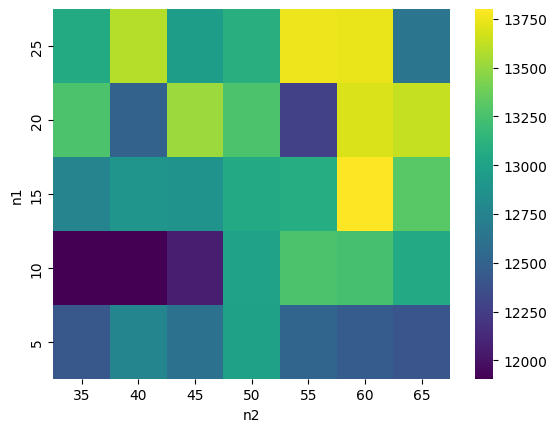

In [23]:
sns.heatmap(heatmap.groupby(['n1', 'n2']).mean().unstack()[::-1], cmap='viridis')

In [24]:
stats._strategy

<Strategy EMA_CrossOver(n1=15,n2=60)>

In [25]:
stats

Start                     2010-01-04 00:00:00
End                       2020-10-01 00:00:00
Duration                   3923 days 00:00:00
Exposure Time [%]                   65.442279
Equity Final [$]                   13799.9765
Equity Peak [$]                    14166.7655
Return [%]                          37.999765
Buy & Hold Return [%]              124.037799
Return (Ann.) [%]                    3.088898
Volatility (Ann.) [%]                8.057532
Sharpe Ratio                         0.383355
Sortino Ratio                         0.55579
Calmar Ratio                         0.176785
Max. Drawdown [%]                  -17.472639
Avg. Drawdown [%]                   -1.884459
Max. Drawdown Duration     1391 days 00:00:00
Avg. Drawdown Duration       71 days 00:00:00
# Trades                                   22
Win Rate [%]                        45.454545
Best Trade [%]                      36.780089
Worst Trade [%]                     -7.129488
Avg. Trade [%]                    

In [26]:
bt.plot(filename="./plots/EMA_Crossover(10,20)_NIFTY_100.png", plot_volume=False, plot_pl=True)

c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\tejas\anaconda3\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1594', ...)